In [1]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
import cv2
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.models import Sequential, Model,load_model
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D,Dropout
import tensorflow as tf
import splitfolders 
import pandas as pd
import glob
from sklearn.metrics import confusion_matrix
import itertools
import plotly.graph_objects as go
import plotly.express as px
#Suppressing Warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [3]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import opendatasets as od

In [5]:
dataset_url='https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors'
od.download(dataset_url)

100%|██████████| 306M/306M [00:09<00:00, 33.9MB/s]


In [6]:
data_url='/content/rockpaperscissors'

In [7]:
!ls -lh {data_url}

total 116K
drwxr-xr-x 2 root root  36K Oct 24 10:31 paper
-rw-r--r-- 1 root root  879 Oct 24 10:31 README_rpc-cv-images.txt
drwxr-xr-x 2 root root  36K Oct 24 10:31 rock
drwxr-xr-x 5 root root 4.0K Oct 24 10:31 rps-cv-images
drwxr-xr-x 2 root root  36K Oct 24 10:31 scissors


In [7]:
paper_url='/content/rockpaperscissors/paper'
rock_url='/content/rockpaperscissors/rock'
scissor_url='/content/rockpaperscissors/scissors'

In [9]:
!ls -lh {paper_url}

total 54M
-rw-r--r-- 1 root root 84K Oct 24 10:31 04l5I8TqdzF9WDMJ.png
-rw-r--r-- 1 root root 83K Oct 24 10:31 0a3UtNzl5Ll3sq8K.png
-rw-r--r-- 1 root root 69K Oct 24 10:31 0cb6cVL8pkfi4wF6.png
-rw-r--r-- 1 root root 58K Oct 24 10:31 0eqArS2GgsBeqgSn.png
-rw-r--r-- 1 root root 68K Oct 24 10:31 0Og76sl5CJhbxWWx.png
-rw-r--r-- 1 root root 82K Oct 24 10:31 0RA9rcrv8iVvuDDU.png
-rw-r--r-- 1 root root 70K Oct 24 10:31 0t08v9bAaA0mXGCQ.png
-rw-r--r-- 1 root root 78K Oct 24 10:31 0Uomd0HvOB33m47I.png
-rw-r--r-- 1 root root 79K Oct 24 10:31 0vugygEjxQJPr9yz.png
-rw-r--r-- 1 root root 81K Oct 24 10:31 0zKU6wEhT2cDe9j0.png
-rw-r--r-- 1 root root 83K Oct 24 10:31 14K62H4KG1hg5qiJ.png
-rw-r--r-- 1 root root 81K Oct 24 10:31 1Dfw5FRlS4h60JPX.png
-rw-r--r-- 1 root root 78K Oct 24 10:31 1fKclJk4eBWOQSR1.png
-rw-r--r-- 1 root root 79K Oct 24 10:31 1Frbe8cdOdkciOBg.png
-rw-r--r-- 1 root root 64K Oct 24 10:31 1jHtb93pI8f6pfKo.png
-rw-r--r-- 1 root root 80K Oct 24 10:31 1oKnUgV2CdCaQUUX.png
-rw-r--r-- 1 r

In [8]:
IMG_SIZE=224

In [9]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    data_url,
    shuffle=True,
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='sparse',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_url,
    shuffle=False,
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='sparse',
    subset='validation'
)

Found 3502 images belonging to 4 classes.
Found 874 images belonging to 4 classes.


In [10]:
# os.rmdir('/content/rockpaperscissors/rps-cv-images')
# since the directory isnt empty, rmdir wont work here
# let's us the shutil package

import shutil
shutil.rmtree('/content/rockpaperscissors/rps-cv-images')

In [11]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=180,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=2
)

train_generator = datagen.flow_from_directory(
    data_url,
    shuffle=True,
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='sparse',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_url,
    shuffle=False,
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='sparse',
    subset='validation'
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [12]:
print(val_generator.class_indices)
print(train_generator.class_indices)

{'paper': 0, 'rock': 1, 'scissors': 2}
{'paper': 0, 'rock': 1, 'scissors': 2}


In [13]:
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        min_delta=1e-2,
        patience=2,
        verbose=2,
    )
]

In [14]:
model_checkpointing = tf.keras.callbacks.ModelCheckpoint(
    filepath='/content/',
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    verbose=1,
    save_best_only=True)

In [15]:
from tensorflow.keras.applications.xception import decode_predictions

In [16]:
FEATURE_EXTRACTOR_URL = 'https://tfhub.dev/google/imagenet/resnet_v2_101/feature_vector/5'

In [17]:
import tensorflow_hub as hub
model = tf.keras.Sequential([
    hub.KerasLayer(FEATURE_EXTRACTOR_URL, trainable=False, input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.Dense(3, activation='softmax')
])

In [21]:
# model=tf.keras.applications.xception.Xception(weights='imagenet',include_top=True)

91884032/91884032 [==============================] - 1s 0us/step


In [18]:
import requests

In [25]:
# response=requests.get('https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json')
# imgnet_map=response.json()
# imgnet_map={v[1]:k for k, v in imgnet_map.items()}
# #make model predictions
# # img=tf.keras.applications.xception.preprocess_input(img)
# # predictions=model.predict(np.array([img]))
# # decode_predictions(predictions,top=2)

In [ ]:
# model.compile(optimizer=keras.optimizers.Adam(),
#               loss=keras.losses.BinaryCrossentropy(from_logits=True),
#               metrics=[keras.metrics.Accuracy(),keras.metrics.TruePositives()])
# model.fit(train_generator,validation_data=val_generator, epochs=20, callbacks=[callbacks,model_checkpointing],verbose=2)

In [19]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[model_checkpointing, callbacks],
    verbose=2
)

Epoch 1/20

Epoch 1: val_accuracy improved from -inf to 0.79863, saving model to /content/
55/55 - 57s - loss: 0.7761 - accuracy: 0.6739 - val_loss: 0.4935 - val_accuracy: 0.7986 - 57s/epoch - 1s/step
Epoch 2/20

Epoch 2: val_accuracy improved from 0.79863 to 0.83982, saving model to /content/
55/55 - 39s - loss: 0.4537 - accuracy: 0.8218 - val_loss: 0.3933 - val_accuracy: 0.8398 - 39s/epoch - 718ms/step
Epoch 3/20

Epoch 3: val_accuracy improved from 0.83982 to 0.87185, saving model to /content/
55/55 - 38s - loss: 0.3676 - accuracy: 0.8635 - val_loss: 0.3414 - val_accuracy: 0.8719 - 38s/epoch - 698ms/step
Epoch 4/20

Epoch 4: val_accuracy did not improve from 0.87185
55/55 - 28s - loss: 0.3555 - accuracy: 0.8624 - val_loss: 0.3454 - val_accuracy: 0.8673 - 28s/epoch - 514ms/step
Epoch 5/20

Epoch 5: val_accuracy did not improve from 0.87185
55/55 - 28s - loss: 0.3287 - accuracy: 0.8704 - val_loss: 0.3391 - val_accuracy: 0.8627 - 28s/epoch - 507ms/step
Epoch 5: early stopping


In [25]:
model.save("my_h5_model.h5")

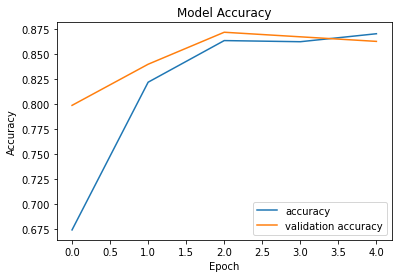

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"],label='accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [35]:
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        # min_delta=1e-2,
        patience=4,
        verbose=2,
    )
]

In [36]:
model_checkpointing = tf.keras.callbacks.ModelCheckpoint(
    filepath='/content/',
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    verbose=1,
    save_best_only=True)

In [37]:
model = tf.keras.Sequential([
    hub.KerasLayer(FEATURE_EXTRACTOR_URL, trainable=False, input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[model_checkpointing, callbacks],
    verbose=2
)


Epoch 1/20

Epoch 1: val_accuracy improved from -inf to 0.76659, saving model to /content/
55/55 - 48s - loss: 0.8203 - accuracy: 0.6476 - val_loss: 0.5291 - val_accuracy: 0.7666 - 48s/epoch - 868ms/step
Epoch 2/20

Epoch 2: val_accuracy improved from 0.76659 to 0.83982, saving model to /content/
55/55 - 41s - loss: 0.4650 - accuracy: 0.8167 - val_loss: 0.4340 - val_accuracy: 0.8398 - 41s/epoch - 741ms/step
Epoch 3/20

Epoch 3: val_accuracy improved from 0.83982 to 0.84897, saving model to /content/
55/55 - 39s - loss: 0.3635 - accuracy: 0.8664 - val_loss: 0.3937 - val_accuracy: 0.8490 - 39s/epoch - 716ms/step
Epoch 4/20

Epoch 4: val_accuracy improved from 0.84897 to 0.85126, saving model to /content/
55/55 - 40s - loss: 0.3293 - accuracy: 0.8692 - val_loss: 0.3536 - val_accuracy: 0.8513 - 40s/epoch - 723ms/step
Epoch 5/20

Epoch 5: val_accuracy improved from 0.85126 to 0.90847, saving model to /content/
55/55 - 40s - loss: 0.3497 - accuracy: 0.8709 - val_loss: 0.2864 - val_accuracy: 

In [38]:
model.save("new_h5_model.h5")

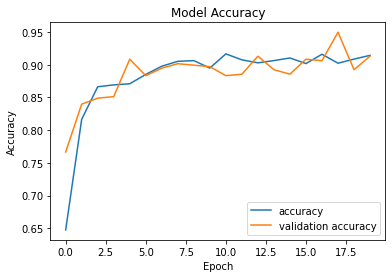

In [39]:
plt.plot(history.history["accuracy"],label='accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')